In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import math
import itertools

In [55]:
#
# The piecewise linear activation function that clips weighted input. 
# A scalar function (numbers in, numbers out)
#
# input: weighted input 
# output: activation
#
def piecewise_linear(weighted_input):
    u = 10
    l = -10
    if(weighted_input > u):
        return u
    elif(weighted_input < l):
        return l
    else:
        return weighted_input        

In [91]:
#
# Alternative activation function that gradually evolves towards the weighted input
#
def integrator(weighted_input):
    return piecewise_linear(weighted_input - .01 * weighted_input)

In [92]:
#
# A function that corresponds to a 2 node, fully connected recurrent network
# 
# This is a function on vectors;a function from one activation vector to another. 
# It is also a rule that defines a dynamical system.  A way to go from an initial point
# in state space to a future point.  You can edit which activation function is used
# if you like.
# 
# input: current activation vector 
# output: activation vector after processing by the network
# 
#
def recurrent_net(activation_vector):
    weighted_inputs = activation_vector.dot(weight_matrix)
    # act_function = np.vectorize(piecewise_linear)
    act_function = np.vectorize(integrator)
    return act_function(weighted_inputs)

In [138]:
# 
# EDIT WEIGHT MATRIX HERE
#
# Weight matrix for the network, which defines a dynamical system on a 2-dimensional
# activation space

# Rotation
# angle = math.pi/12
# weight_matrix = np.array([[math.cos(angle),-math.sin(angle)],[math.sin(angle),math.cos(angle)]])

# Stretching by k
# k = -2.4 # -1, 10
# weight_matrix = np.array([[k,0],[0,1]])

# Identity
# weight_matrix = np.array([[1,0],[0,1]])

# Other examples
weight_matrix = np.array([[-1,1],[-1.1,-.1]])
# weight_matrix = np.array([[0,1],[1,0]])

In [139]:
#
# Print eigenvalues (optional)
#
# Cf http://www.cnbc.cmu.edu/~bard/xppfast/lin2d.html
# eigenvalues = np.linalg.eigvals(weight_matrix)
# print(eigenvalues)

[-0.55+0.94736477j -0.55-0.94736477j]


In [140]:
#
# EDIT INITIAL CONDITIONS HERE
#

# A list of initial conditions to test.  Orbits arising from these initial conditions 
# will then be plotted.
#
init_conditions = [np.array([.5,.5])] # A single initial condition
# init_conditions = [np.array([.5,.5]),np.array([.5,.56])] # Initial condition with perturbation to test for attractors
# init_conditions = [np.array([.5,.5]), np.array([-.5,-.5])] # A list of initial conditions
# grid = np.array(list(itertools.product([.1,.4,1,5], repeat=2)))
# grid = np.array(list(itertools.product([1,2,3,4,5,-1,-2,-3,-4,-5], repeat=2)))
# init_conditions = grid

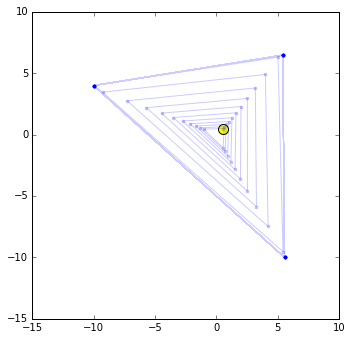

In [141]:
#
# Plot orbits given initial conditions and weights
# 
for ic in init_conditions:
    orbit_length = 100  # EDIT: Set how long the orbit is here
    orbit = np.zeros((orbit_length,2))
    orbit[0] = ic
    plt.scatter(ic[0],ic[1], c="yellow", s=100) # Plot initial conditions
    for i in range(1,orbit_length):
        orbit[i] = recurrent_net(orbit[i-1])
    plt.plot(orbit[:,0],orbit[:,1],'.-',alpha = .2, color = 'blue')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(5.5, 5.5) # Set plot size here
fig.savefig('phase_portrait.png')

In [142]:
# 
# Function to print orbits relative to initial condition
#
def print_orbit(init_condition):
    print("init condition:",init_condition)
    orbit_length = 100 # EDIT: Set how long to show orbits for here
    orbit = np.zeros((orbit_length,2))
    orbit[0] = init_condition
    for i in range(1,orbit_length):
        orbit[i] = recurrent_net(orbit[i-1])
        print(np.round(orbit[i],5))
    print("-----------")

In [143]:
#
# Print orbits for each initial condition
#
for ic in init_conditions:
    print_orbit(ic)

init condition: [ 0.5  0.5]
[-1.0395  0.4455]
[ 0.54396 -1.07321]
[ 0.63021  0.64476]
[-1.32605  0.56008]
[ 0.70287 -1.36824]
[ 0.79417  0.8313 ]
[-1.69152  0.70393]
[ 0.90802 -1.74429]
[ 1.00059  1.07162]
[-2.15758  0.8845 ]
[ 1.17279 -2.22357]
[ 1.26041  1.3812 ]
[-2.75193  1.11106]
[ 1.51446 -2.8344 ]
[ 1.58735  1.77992]
[-3.50981  1.39527]
[ 1.95527 -3.61284]
[ 1.99867  2.29339]
[-4.47618  1.75164]
[ 2.52389 -4.60483]
[ 2.51602  2.95453]
[-5.70834  2.19836]
[ 3.25724 -5.86889]
[ 3.16655  3.80569]
[-7.27928  2.75812]
[ 4.20289 -7.47954]
[ 3.98436  4.90134]
[-9.28207  3.45928]
[ 5.42209 -9.53172]
[ 5.01217  6.31151]
[-10.   4.]
[  5.544 -10.   ]
[ 5.40144  6.47856]
[-10.   4.]
[  5.544 -10.   ]
[ 5.40144  6.47856]
[-10.   4.]
[  5.544 -10.   ]
[ 5.40144  6.47856]
[-10.   4.]
[  5.544 -10.   ]
[ 5.40144  6.47856]
[-10.   4.]
[  5.544 -10.   ]
[ 5.40144  6.47856]
[-10.   4.]
[  5.544 -10.   ]
[ 5.40144  6.47856]
[-10.   4.]
[  5.544 -10.   ]
[ 5.40144  6.47856]
[-10.   4.]
[  5.544 -10